In [101]:
import matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from helpers import download_dataset

In [60]:
URL = 'https://www.kaggle.com/crawford/weekly-sales-transactions'
DEST = './data'
download_dataset(URL, './data')
df = pd.read_csv('./data/%s' % 'Sales_Transactions_Dataset_Weekly.csv', encoding='utf-8').dropna()

In [61]:
week_cols = ['W%s' % i for i in range(52)]
norm_cols = ['Normalized %s' % i for i in range(52)]

week_df = df[week_cols]
norm_df = df[norm_cols]

In [62]:
minimum = pd.concat([df.Product_Code, week_df.min(axis=1)], keys=['Product_Code', 'Min'], axis=1)
maximum = pd.concat([df.Product_Code, week_df.max(axis=1)], keys=['Product_Code', 'Max'], axis=1)
median = pd.concat([df.Product_Code, week_df.median(axis=1)], keys=['Product_Code', 'Median'], axis=1)

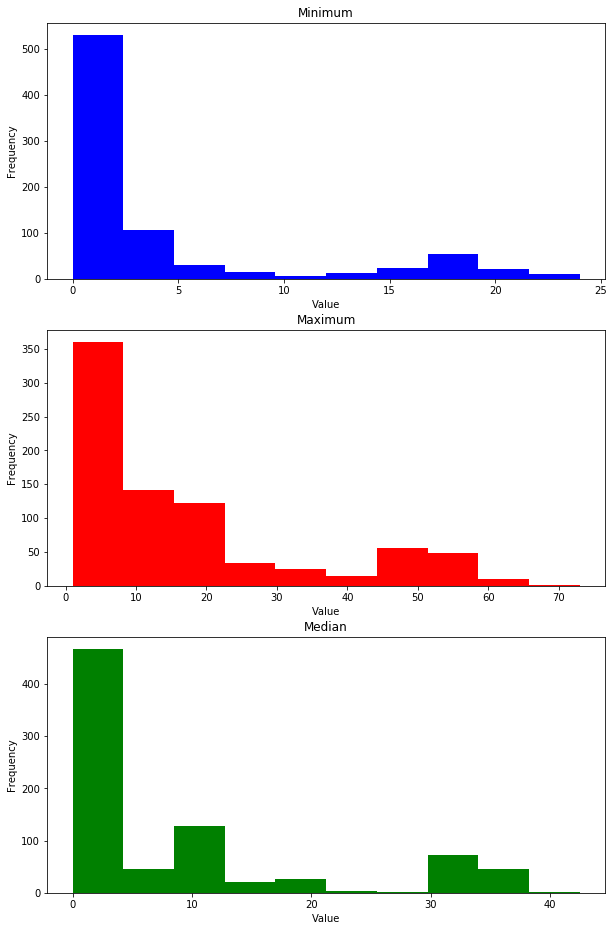

In [63]:
plt.figure(figsize=(10,16))
plot = {'Minimum': minimum.Min, 'Maximum': maximum.Max, 'Median': median.Median}
colour = ['blue', 'red', 'green']

for i in range(1, 4):
    plt.subplot(3, 1, i)
    title = list(plot.keys())[i-1]
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.hist(plot[title], bins=10, color=colour[i-1])

In [85]:
best_performing_product =  df.loc[df[week_cols].sum(axis=1).idxmax(), 'Product_Code']
#most_promising_product = 
#worst_performing_product

'P409'

In [81]:
df.loc[406, week_cols].sum()

2220

In [88]:
def get(data):
    data = data[week_cols]
    max_z_score = 3

In [99]:
def get_outliers(sales_data):
    print('Outliers by week \n')
    sales_np_array = np.array(sales_data.loc[:, sales_data.columns[1:53]])
    print("\n")
    for row in sales_np_array:
        mean = np.mean(row)
        std = np.std(row)
        scores = [(i-mean) / std for i in row]
        index_data = np.array(np.where(np.abs(scores) > 3)).tolist()
    print(sales_data.columns[[i for index in index_data for i in index]])

In [100]:
gg = get_outliers(df)

Outliers by week 



Index(['W17', 'W34'], dtype='object')
